In [23]:
'''
方法1：三层全连接
'''
from keras.datasets import imdb
import numpy as np
from keras import models
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
#from keras.layers.embeddings import Embedding 
#数据库加载
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#可以将评论解码为英文单词
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [24]:
#将列表进行one-hot编码

def vectorize_sequences(sequences, dimension=10000):
   
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # 索引results矩阵中的位置，赋值为1，全部都是从第0行0列开始的
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
#训练集中拿出10000个作为验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [75]:
model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_34 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [37]:
model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=100,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/10
150/150 [==============================] - 6s 41ms/step - loss: 0.3926 - accuracy: 0.8468 - val_loss: 0.2827 - val_accuracy: 0.8888
Epoch 2/10
150/150 [==============================] - 7s 46ms/step - loss: 0.2073 - accuracy: 0.9222 - val_loss: 0.2783 - val_accuracy: 0.8888
Epoch 3/10
150/150 [==============================] - 8s 54ms/step - loss: 0.1517 - accuracy: 0.9445 - val_loss: 0.3089 - val_accuracy: 0.8830
Epoch 4/10
150/150 [==============================] - 4s 30ms/step - loss: 0.1166 - accuracy: 0.9579 - val_loss: 0.3474 - val_accuracy: 0.8800
Epoch 5/10
150/150 [==============================] - 7s 45ms/step - loss: 0.0895 - accuracy: 0.9684 - val_loss: 0.3888 - val_accuracy: 0.8789
Epoch 6/10
150/150 [==============================] - 6s 40ms/step - loss: 0.0700 - accuracy: 0.9757 - val_loss: 0.4420 - val_accuracy: 0.8762
Epoch 7/10
150/150 [==============================] - 6s 40ms/step - loss: 0.0529 - accuracy: 0.9829 - val_loss: 0.4952 - val_accuracy: 0.8719

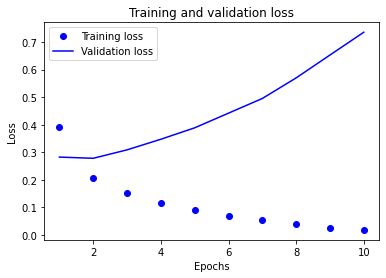

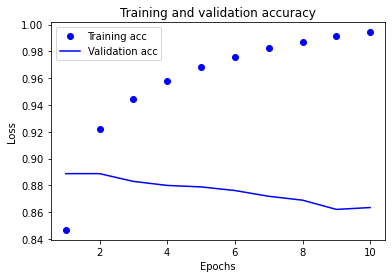

In [38]:
history_dict = history.history
history_dict.keys()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')  # bo表示蓝色圆点
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # b表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  #如果不加这一句就不会显示图例
plt.show()
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
y_pred=model.predict(x_test)
y_pred_binary = []
for item in y_pred:
    if item <= 0.5:
        a = 0
    else:
        a = 1
    y_pred_binary.append(a)
precision_recall_fscore_support(y_test, y_pred_binary, average=None)

(array([0.83251383, 0.8611482 ]),
 array([0.86688, 0.8256 ]),
 array([0.84934943, 0.84299951]),
 array([12500, 12500]))

In [81]:
'''
方法2 Embedding+LSTM
'''
from keras.datasets import imdb
import numpy as np
from keras import models
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from keras.preprocessing import sequence

#数据库加载
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=3800)
#这次是通过pad_sequences的方式补齐或截断列表，将其转化为tensor
x_train = sequence.pad_sequences(train_data, maxlen=500)
x_test  = sequence.pad_sequences(test_data,  maxlen=500)
model = models.Sequential()
model.add(Embedding(input_dim=3800,output_dim=32,input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256,activation='relu' ))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid' ))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 500, 32)           121600    
_________________________________________________________________
dropout_15 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_38 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 257       
Total params: 138,625
Trainable params: 138,625
Non-trainable params: 0
_______________________________________________

In [82]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

train_history =model.fit(x_train, train_labels,batch_size=100, 
                         epochs=10,verbose=2,
                         validation_split=0.2)

Epoch 1/10
200/200 - 153s - loss: 0.4622 - accuracy: 0.7661 - val_loss: 0.3271 - val_accuracy: 0.8636
Epoch 2/10
200/200 - 153s - loss: 0.2705 - accuracy: 0.8940 - val_loss: 0.2895 - val_accuracy: 0.8806
Epoch 3/10
200/200 - 160s - loss: 0.2273 - accuracy: 0.9133 - val_loss: 0.2959 - val_accuracy: 0.8786
Epoch 4/10
200/200 - 144s - loss: 0.2115 - accuracy: 0.9192 - val_loss: 0.3059 - val_accuracy: 0.8722
Epoch 5/10
200/200 - 149s - loss: 0.1780 - accuracy: 0.9338 - val_loss: 0.3429 - val_accuracy: 0.8754
Epoch 6/10
200/200 - 148s - loss: 0.1632 - accuracy: 0.9400 - val_loss: 0.3525 - val_accuracy: 0.8706
Epoch 7/10
200/200 - 154s - loss: 0.1428 - accuracy: 0.9470 - val_loss: 0.3951 - val_accuracy: 0.8632
Epoch 8/10
200/200 - 151s - loss: 0.1370 - accuracy: 0.9473 - val_loss: 0.4096 - val_accuracy: 0.8526
Epoch 9/10
200/200 - 146s - loss: 0.1157 - accuracy: 0.9589 - val_loss: 0.4806 - val_accuracy: 0.8656
Epoch 10/10
200/200 - 151s - loss: 0.1020 - accuracy: 0.9628 - val_loss: 0.4712 - 

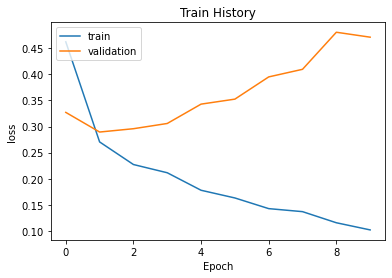

In [83]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'loss','val_loss')

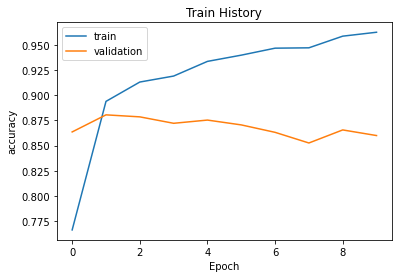

In [84]:
show_train_history(train_history,'accuracy','val_accuracy')

In [85]:
#test上的损失和准确率
scores = model.evaluate(x_test, test_labels)

782/782 [==============================] - 99s 126ms/step - loss: 0.4595 - accuracy: 0.8611


In [86]:
y_pred=model.predict(x_test)
y_pred_binary = []
for item in y_pred:
    if item <= 0.5:
        a = 0
    else:
        a = 1
    y_pred_binary.append(a)
precision_recall_fscore_support(test_labels, y_pred_binary, average=None)

(array([0.86226824, 0.85989953]),
 array([0.85944, 0.86272]),
 array([0.8608518 , 0.86130746]),
 array([12500, 12500]))